In [12]:
import requests
from html.parser import HTMLParser

In [13]:
url = 'https://en.wikipedia.org/wiki/Big_data'

In [14]:
text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Big data - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1

In [15]:
class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Big data - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page across from the title. Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Definition Toggle Definition subsection 1.1 Big data vs. business intelligence 2 Characteristics 3 Architecture 4 Technologies 5 Applications Toggle Applications subsection 5.1 Government 5.2 International development 5.2.1 Benefits 5.2.2 Challenges 5.3 Finance 5.4 Healthcare 5.5 Education 5.6 Media 5.7 Insurance 5.8 Internet of things (IoT) 5.9 Information technology 5.10 Survey science 6 Case studies Toggle Case studies subsection 6.1 Government 6.1.1 China 6.1.2 India 6.1.3 Israel 6.1.4

In [16]:
import sys
!{sys.executable} -m pip install nlp_rake


[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('big data', 4.0),
 ('data sets', 4.0),
 ('machine learning', 4.0),
 ('latin america', 4.0),
 ('computer-aided diagnosis', 4.0),
 ('data flow', 4.0),
 ('scientific reports', 4.0),
 ('wayback machine', 4.0),
 ('washington post', 4.0),
 ('english version', 4.0),
 ('unsourced statements', 4.0),
 ('data management', 3.916666666666667),
 ('artificial intelligence', 3.909090909090909),
 ('predictive analytics', 3.8421052631578947),
 ('citation needed', 3.833333333333333),
 ('special issue', 3.8),
 ('data collected', 3.769230769230769),
 ('business intelligence', 3.7552447552447554),
 ('^ kitchin', 3.738888888888889),
 ('promotional source', 3.7142857142857144),
 ('york times', 3.642857142857143),
 ('financial times', 3.642857142857143),
 ('data sources', 3.6363636363636367),
 ('unstructured data', 3.625),
 ('international journal', 3.619047619047619),
 ('cite journal', 3.619047619047619),
 ('data mining', 3.6),
 ('national archives', 3.583333333333333),
 ('structured data', 3.57142857142857

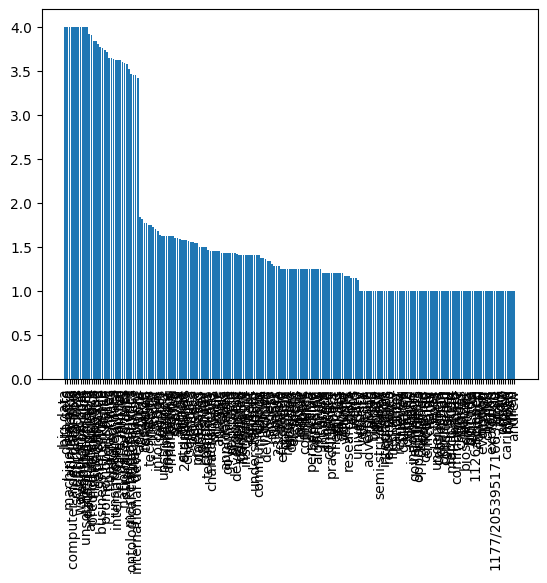

In [18]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [19]:
!{sys.executable} -m pip install wordcloud


[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


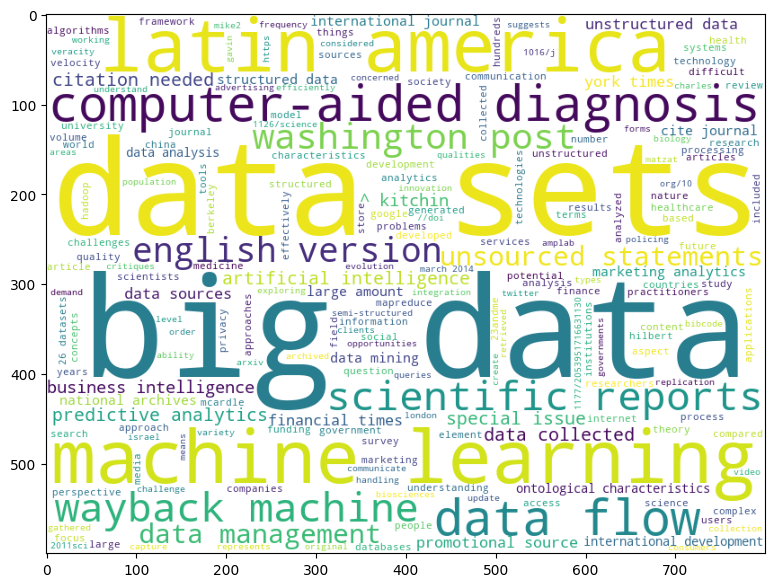

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

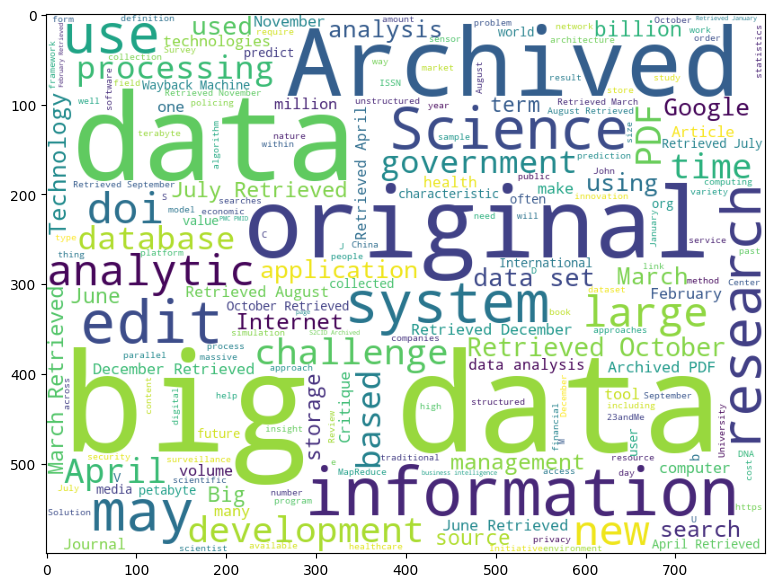

In [21]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [22]:
wc.generate(text).to_file('./nube_palabras_Big_data.png')